In [1]:
n = range(1,101)
print(n)

range(1, 101)


In [2]:
odd_no = 0
total_no = 0
second = 0
for i in range(1,101):
    total_no += 1 
    if i%2 != 0 :
        odd_no += 1
    if i>25:
        second+=1
print(second)
print(odd_no)
print(total_no)

75
50
100


In [3]:
import random
import numpy as np
import scipy
from itertools import product
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Let us define a function for probability which we will use multiple times later.
# Here both the variables passed to the function is n(F) and n(S)
def find_prob(favourable_outcomes, sample_space):
  if sample_space < favourable_outcomes:
    print ("There is a mistake in calculation. Probability <= 1")
    return -1
  else:
    prob = favourable_outcomes/sample_space
    return prob

In [5]:
# Solving Q1 and Q2 by this code snippet. This is to check the correctness of the above function.
S = [1, 2, 3, 4, 5, 6]
F = [1, 3, 5]
prob_odd = find_prob(len(F), len(S))
print ("Probability of an odd occurance in a dice throw: ", prob_odd)

Probability of an odd occurance in a dice throw:  0.5


In [6]:
# Two desired outcomes from a dice throw.
F1 = [4]
F2 = [5]
prob_f1 = find_prob(len(F1), len(S))
prob_f2 = find_prob(len(F2), len(S))
prob_f1_f2 = prob_f1 + prob_f2
print("Probability of getting 4 or 5 in a dice throw: ", prob_f1_f2)

Probability of getting 4 or 5 in a dice throw:  0.3333333333333333


In [7]:
# Code for Q3. 
S = [1, 2, 3, 4, 5, 6]
F_even = [2, 4, 6]
F_prime = [3, 5]
prob_f_even = find_prob(len(F_even), len(S))
prob_f_prime = find_prob(len(F_prime), len(S))
prob_f_even_f_prime = prob_f_even * prob_f_prime
print("Probability of getting an even number in first throw and a prime number in second: ", prob_f_even_f_prime)

Probability of getting an even number in first throw and a prime number in second:  0.16666666666666666


In [8]:
# Fake data generator for a set of 100,000 people. The dictionaries totals and purchases will hold 
# the data for 100,000 dummy people.
totals = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
purchases = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
totalPurchases = 0
for _ in range(100000):
    ageDecade = random.choice([20, 30, 40, 50, 60, 70])
    # ageDecade in each loop is just an integer between [20, 30, 40, 50, 60, 70]
    # print("ageDecade>>>",type(ageDecade))
    purchaseProbability = float(ageDecade) / 100.0
    # print("purchaseProbability>>>>>",purchaseProbability)
    # only the numerator(ageDecade) changes right Hence the probability associated with young people is less
    # and of older people is high
    # we are just givng probabilty values to people in certain age group
    totals[ageDecade] += 1
    # adding person in the dictionary as per the age group
    # print("totals>>>>>>>",totals)
    # print(random.random())
    # random.random()  The random() method returns a random floating number between 0 and 1. [0.0, 1.0)
    # purchaseProbability cannot be less than 0
    # but still why this line
    if (random.random() < purchaseProbability):
        totalPurchases += 1
        purchases[ageDecade] += 1
    # else:
    #     print("anomly")

print ("Total number of people in different each range: ", totals)
print ("Purchases made by people from different age ranges", purchases)
print ("Total purchases made: ", totalPurchases)

Total number of people in different each range:  {20: 16668, 30: 16601, 40: 16574, 50: 16790, 60: 16571, 70: 16796}
Purchases made by people from different age ranges {20: 3258, 30: 5000, 40: 6600, 50: 8426, 60: 10023, 70: 11761}
Total purchases made:  45068


In [9]:
# First let us solve this directly. purchases[30] has the number 
# of purchases made by 30 year olds. totals[30] contains the total number of 30 year olds. 
print(totals[30])
print(purchases[30])
P_A_B = find_prob(purchases[30], totals[30])
print('P(purchase | 30s): ' + str(P_A_B))

16601
5000
P(purchase | 30s): 0.3011866755014758


In [10]:
# Now let us try out the formula and see if it maches the above result.
# probability of being 30 in the corpus. P(B) = ?
P_B = find_prob(totals[30], 100000)
print ("P(B) = ", P_B)

P(B) =  0.16601


In [11]:
# probability of making a purchase (regardless of age). P(A) = ?
P_A = find_prob(totalPurchases, 100000)
print ("P(A) = ", P_A)

P(A) =  0.45068


In [12]:
# What is the probability of both being in your 30's and buying something,
# out of the total population - not just the population of people in their 30's. 
# P(A Intersection B) = ?
P_A_INT_B = find_prob(purchases[30], 100000)
print ("P(A INT B) = ", P_A_INT_B)

P(A INT B) =  0.05


In [13]:
# Therefore, now lets test the formula. P(A|B) = P(A INT B)/P(B)
P_A_B_formula = P_A_INT_B / P_B
print ('P(purchase | 30s) using formula: ', P_A_B_formula)

# PLEASE NOTE THAT THE FORMULA GIVES THE EXACT SAME RESULT AS THE PREVIOUS CELL.

P(purchase | 30s) using formula:  0.3011866755014759


In [14]:
# Creating a dice.
dice = range(1,7)
# Creating the combinations for the outcomes of two dices.
print(list(zip(range(1,7), range(1, 7))))
dice_scores = dict(zip(range(1,7), range(1, 7)))
print("dice>>>>>>>",dice)
print("dice_scores>>>>>>>>>",dice_scores)

[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6)]
dice>>>>>>> range(1, 7)
dice_scores>>>>>>>>> {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


In [15]:
for i,j in product(dice,repeat=2):
    print(i,j)

1 1
1 2
1 3
1 4
1 5
1 6
2 1
2 2
2 3
2 4
2 5
2 6
3 1
3 2
3 3
3 4
3 5
3 6
4 1
4 2
4 3
4 4
4 5
4 6
5 1
5 2
5 3
5 4
5 5
5 6
6 1
6 2
6 3
6 4
6 5
6 6


In [16]:
#  Creating the sample space for this problem. Please uncomment the print statement to check.
S = {(i, j): dice_scores[i] + dice_scores[j] for i, j in product(dice, repeat=2)}
print (S)

{(1, 1): 2, (1, 2): 3, (1, 3): 4, (1, 4): 5, (1, 5): 6, (1, 6): 7, (2, 1): 3, (2, 2): 4, (2, 3): 5, (2, 4): 6, (2, 5): 7, (2, 6): 8, (3, 1): 4, (3, 2): 5, (3, 3): 6, (3, 4): 7, (3, 5): 8, (3, 6): 9, (4, 1): 5, (4, 2): 6, (4, 3): 7, (4, 4): 8, (4, 5): 9, (4, 6): 10, (5, 1): 6, (5, 2): 7, (5, 3): 8, (5, 4): 9, (5, 5): 10, (5, 6): 11, (6, 1): 7, (6, 2): 8, (6, 3): 9, (6, 4): 10, (6, 5): 11, (6, 6): 12}


In [17]:
# length of the sample space
n_S = len(S)
print("n_S>>>>>>>>>>",n_S)

n_S>>>>>>>>>> 36


In [18]:
print(S.values())

dict_values([2, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 12])


In [19]:
print(S.items())

dict_items([((1, 1), 2), ((1, 2), 3), ((1, 3), 4), ((1, 4), 5), ((1, 5), 6), ((1, 6), 7), ((2, 1), 3), ((2, 2), 4), ((2, 3), 5), ((2, 4), 6), ((2, 5), 7), ((2, 6), 8), ((3, 1), 4), ((3, 2), 5), ((3, 3), 6), ((3, 4), 7), ((3, 5), 8), ((3, 6), 9), ((4, 1), 5), ((4, 2), 6), ((4, 3), 7), ((4, 4), 8), ((4, 5), 9), ((4, 6), 10), ((5, 1), 6), ((5, 2), 7), ((5, 3), 8), ((5, 4), 9), ((5, 5), 10), ((5, 6), 11), ((6, 1), 7), ((6, 2), 8), ((6, 3), 9), ((6, 4), 10), ((6, 5), 11), ((6, 6), 12)])


In [20]:
# Collecting all the sums possible in the sample space. (1,2) -> 3, (2,1) -> 3. Therefore freq for 3 is 2.
# We get all the possible outcomes and their frequencies using this.
# dict.fromkeys(keys, value)
# keys	Required. An iterable specifying the keys of the new dictionary
# value	Optional. The value for all keys. Default value is None
frequencies = dict.fromkeys(S.values(), 0)
print("frequencies>>>>>>",frequencies)
for sample_outcome, overall_score in S.items():
    frequencies[overall_score] += 1
print("frequencies>>>>>>>>",frequencies)

frequencies>>>>>> {2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}
frequencies>>>>>>>> {2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}


[[2, 0.027777777777777776], [3, 0.05555555555555555], [4, 0.08333333333333333], [5, 0.1111111111111111], [6, 0.1388888888888889], [7, 0.16666666666666666], [8, 0.1388888888888889], [9, 0.1111111111111111], [10, 0.08333333333333333], [11, 0.05555555555555555], [12, 0.027777777777777776]]
    Total Score of two dice roles  Probability
0                               2     0.027778
1                               3     0.055556
2                               4     0.083333
3                               5     0.111111
4                               6     0.138889
5                               7     0.166667
6                               8     0.138889
7                               9     0.111111
8                              10     0.083333
9                              11     0.055556
10                             12     0.027778


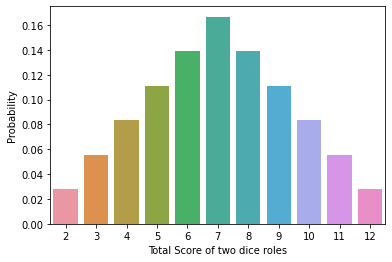

In [21]:
# Calculating the probability for each possible outcome by 
# freq of an outcome/total number of outcome
probabilities = pd.DataFrame(data=[[value, frequency / n_S]for value, frequency in frequencies.items()],
    columns=['Total Score of two dice roles', 'Probability']
)
print([[value, frequency / n_S]for value, frequency in frequencies.items()])
print(probabilities)
# plot PMF as barplot
ax = sns.barplot(
    x='Total Score of two dice roles',
    y='Probability',
    data=probabilities,
)

d:\Hive\py_385\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

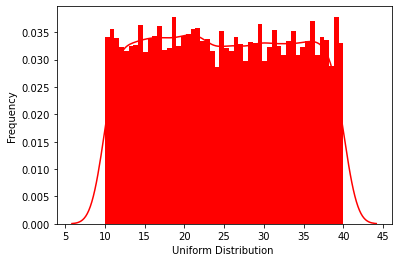

In [27]:
# Plotting random numbers generated from a uniform distribution
n = 10000         # Number of random numbers to be generated
a = 10            # a in the given formula
b = 30            # b in the given formula
data_uniform = scipy.stats.uniform.rvs(size=n, loc = a, scale=b)
ax = sns.distplot(data_uniform,
                  bins=50,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 5,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

d:\Hive\py_385\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


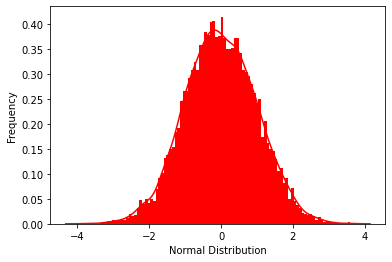

In [28]:
# Let us consider a mean and varience for our normal distribution
mu = 0
standard_dev = 1    # We need to define the standard daviation and not the varience! The function will square it internally.


# 10000 points are sampled from the normal distribution with given mu and sigma = standard_dev^2.
data_normal = scipy.stats.norm.rvs(size=10000, loc=mu, scale=standard_dev)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_14416/3902605588.py:22: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


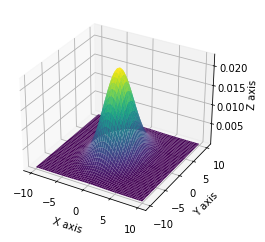

In [31]:
# We set the parameters for mu and sigma first.
# The mu vector is taken as [0, 0] and the cov matrix is taken as [[5, 0]
#                                                                  [0, 10]] 
mu_x = 0
variance_x = 5

mu_y = 0
variance_y = 10

# Creating the distribution with the given parameters.
rv = scipy.stats.multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

#Creating a grid. This is important to plot 3D distributions.
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [36]:
print(X.shape)

(500, 500)


In [35]:
X.shape + (2,)

(500, 500, 2)

In [40]:
pos1 = np.empty(X.shape + (2,))
print(pos1[0][0][0])

0.0
